In [1]:
#!/usr/bin/env/python -W ignore::DeprecationWarning
import pandas as pd
import numpy as np

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#The classifiers
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

# Model selection
from sklearn.model_selection import  GridSearchCV, train_test_split

# For scoring
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/customer_churn_balanced.csv')

In [3]:
data.head()

,Tenure,Gender,Geography,salary_quantiles,age_quantiles,NumOfProducts,HasCrCard,Exited
0,2,Male,France,second,first,2,1,0
1,6,Female,France,second,sixth,2,1,0
2,5,Male,France,sixth,third,2,0,0
3,1,Female,France,third,first,1,0,0
4,5,Male,France,sixth,fifth,1,1,1


In [4]:
# I prefer working with all lower-case columns
data.columns = ['tenure','gender','geography','salary_quantiles', 'age_quantiles', 'num_products', 'has_card', 'exited']

In [5]:
X = data.ix[:,0:7]

In [77]:
y = data.ix[:,7]

In [7]:
# Before we model, let's look at feature selection again.

# Intitiate our label encoder for the categorical variables

labelencoder_X1 = LabelEncoder()
X.ix[:, 1] = labelencoder_X1.fit_transform(X.ix[:, 1])

In [8]:
labelencoder_X2 = LabelEncoder()
X.ix[:, 2] = labelencoder_X2.fit_transform(X.ix[:, 2])

In [9]:
labelencoder_X3 = LabelEncoder()
X.ix[:, 3] = labelencoder_X3.fit_transform(X.ix[:, 3])

In [10]:
labelencoder_X4 = LabelEncoder()
X.ix[:, 4] = labelencoder_X4.fit_transform(X.ix[:, 4])

In [11]:
params = {
    'n_estimators': 10000,
    'criterion': 'gini',#default
    'random_state':0,
    'n_jobs':-1
}

clf = RandomForestClassifier(**params)

clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
names =['tenure','gender','geography','salary_quantiles', 'age_quantiles', 'num_products', 'has_card']

In [13]:
feature_importances = (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names),
                          reverse=True))

In [14]:
importances = [x[0] for x in feature_importances]
features = [x[1] for x in feature_importances]

Text(0.5, 1.0, 'Feature Importance')

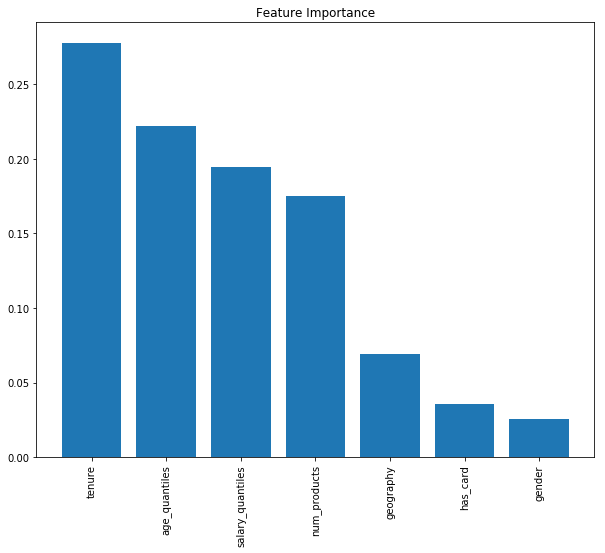

In [15]:
fig = plt.figure(figsize=(10,8))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Boosting
params = {
    'n_estimators': 50,
    'learning_rate':10
}

clf = AdaBoostClassifier(**params)

clf.fit(x_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=10,
          n_estimators=50, random_state=None)

In [18]:
#Although we are using AUROC, let's look at the score for the first run
clf.score(x_test, y_test)

0.8038692461641094

In [ ]:
params = {
    'n_estimators': [100,200, 250, 300, 350, 400, 450,500],
    'random_state':[2],
    'learning_rate':[.10,.15,.20,.25,.5,1,2,4,8,10]

}

clf = AdaBoostClassifier()

search = GridSearchCV(clf, params,'roc_auc', n_jobs=-1)

In [ ]:
search.fit(x_train, y_train)

In [ ]:
search.best_params_

In [ ]:
# Boosting
params = {
    'n_estimators': 400,
    'learning_rate':.25
}

clf = AdaBoostClassifier(**params)

clf.fit(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [24]:
roc_auc_score(y_train, clf.decision_function(x_train))

0.8350533229393764

In [25]:
params = {
    'n_estimators': [5,10,50,100,500,1000,5000,10000,20000],
    'random_state':[2],
    'learning_rate':[.01,.02,.05,.10,.25,.5,1],
    'max_depth':[1,2,3,4,5,6]
    
}

clf = GradientBoostingClassifier()

search = GridSearchCV(clf, params, n_jobs=-1)

In [27]:
search.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 50, 100, 500, 1000, 5000, 10000, 20000], 'random_state': [2], 'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 1], 'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
search.best_params_

{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 2}

In [33]:
params = {
    'n_estimators': 50,
    'random_state':2,
    'learning_rate':1,
    'max_depth':2
    
}

clf = GradientBoostingClassifier(**params)
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=2,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
clf.score(x_test, y_test)

0.8152101400933957

In [35]:
roc_auc_score(y_train, clf.decision_function(x_train))

0.8439944978877841

In [22]:
params = {
    'n_estimators': [5000,10000, 15000,20000,25000],
    #'criterion': ['gini'],#default
    'random_state':[0]
    
}

clf = RandomForestClassifier()

search = GridSearchCV(clf, params, n_jobs=3)

In [23]:
search.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [5000, 10000, 15000, 20000, 25000], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
search.best_params_

{'n_estimators': 10000, 'random_state': 0}

In [25]:
params = {
    'n_estimators': 10000,
    'criterion': 'gini',#default
    'random_state':0
}

clf = RandomForestClassifier(**params)

clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
clf.score(x_test, y_test)

0.9352901934623082

In [47]:
 y_predicted =clf.predict_proba(x_test)[:, 1]

In [48]:
roc_auc_score(y_test, y_predicted)

0.9862076538455645

## 94% - 98% accurate. Quite a model indeed. However, a little more testing is in order.
## AdaBoost comes in around 84% while GradientBoosting comes in at 85%.
## It looks like we got some pretty good models, with the RandomForest seeming to be be best for this data.


In [79]:
# Finally, I will output the data into a csv to use for a neural network.
X.to_csv('data/x_out.csv')
y.to_csv('data/y_out.csv')